In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
import itertools
import os

In [2]:
# Gaussian, t_Copula, Clayton, Frank, Gumbel, Plackett, Gaussian mix Indep
rho_S = 0.75
h=0.5
x_arr = np.linspace(-3,3,100)

C1  = Gaussian(dict(rho=0.9),       Law_RS=stats.norm, Law_RF=stats.norm) # fix the maringals!
C2  = t_Copula(dict(rho=0.1, nu=4), Law_RS=stats.norm, Law_RF=stats.norm, nu_lowerbound=2) 
C3  = Clayton(dict(theta=0.1),      Law_RS=stats.norm, Law_RF=stats.norm)
C4  = Frank(dict(theta=0.1),        Law_RS=stats.norm, Law_RF=stats.norm)
C5  = Gumbel(dict(theta=3),         Law_RS=stats.norm, Law_RF=stats.norm)
C6  = Plackett(dict(theta=10),      Law_RS=stats.norm, Law_RF=stats.norm)
C7  = Gaussian_Mix_Independent(dict(rho=.5,p=0.7),Law_RS=stats.norm, Law_RF=stats.norm)
Copulae_names = ['Gaussian', 't_Copula', 'Clayton', 'Frank', 'Gumbel', 'Plackett', 'Gauss Mix Indep']
Copulae_arr   = [C1,C2,C3,C4,C5,C6,C7]
Copulae = dict(zip(Copulae_names, Copulae_arr))

In [3]:
fn = lambda rho: (6/np.pi * np.arcsin(rho/2)-rho_S)**2
rho = scipy.optimize.fmin(fn, 0.3)[0]
C1  = Gaussian(dict(rho=rho), Law_RS=stats.norm, Law_RF=stats.norm) # fix the maringals!
f1 = [C1.f_RH(h, x) for x in x_arr]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 34


In [4]:
def fn(rho):
    if rho>=1:
        return 5000
    C2  = t_Copula(dict(rho=rho, nu=2), Law_RS=stats.norm, Law_RF=stats.norm, nu_lowerbound=2) 
    return (stats.spearmanr(C2.sample(200000))[0] - rho_S)**2

rho = scipy.optimize.fmin(fn, 0.75)[0]

C2  = t_Copula(dict(rho=rho, nu=4), Law_RS=stats.norm, Law_RF=stats.norm, nu_lowerbound=2) 
f2 = [C2.f_RH(h, x) for x in x_arr]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 24


In [5]:
def fn(theta):
    C3  = Clayton(dict(theta=theta), Law_RS=stats.norm, Law_RF=stats.norm)
    return (stats.spearmanr(C3.sample(200000))[0] - rho_S)**2

theta = scipy.optimize.fmin(fn, 10)[0]
C3  = Clayton(dict(theta=theta), Law_RS=stats.norm, Law_RF=stats.norm)
f3 = [C3.f_RH(h, x) for x in x_arr]

/Users/francis/Google Drive/00_IRTG1792/copula/src/copulae1.py:409: RuntimeWarning: divide by zero encountered in true_divide
  u2 = (u1 ** (-self.theta) * (v2 ** (-self.theta / (1 + self.theta)) - 1) + 1) ** (-1 / self.theta)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 48


In [6]:
def fn(theta):
    C4  = Frank(dict(theta=theta),        Law_RS=stats.norm, Law_RF=stats.norm)
    return (stats.spearmanr(C4.sample(200000))[0] - rho_S)**2

theta = scipy.optimize.fmin(fn, 10)[0]
C4  = Frank(dict(theta=theta), Law_RS=stats.norm, Law_RF=stats.norm)
f4 = [C4.f_RH(h, x) for x in x_arr]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 47


In [7]:
def fn(theta):
    C5  = Gumbel(dict(theta=theta),        Law_RS=stats.norm, Law_RF=stats.norm)
    return (stats.spearmanr(C5.sample(200000))[0] - rho_S)**2

theta = scipy.optimize.fmin(fn, 10)[0]
C5  = Gumbel(dict(theta=theta), Law_RS=stats.norm, Law_RF=stats.norm)
f5 = [C5.f_RH(h, x) for x in x_arr]

/Users/francis/Google Drive/00_IRTG1792/copula/src/copulae1.py:681: RuntimeWarning: invalid value encountered in power
  G_hat = lambda t: np.exp(-t ** (1 / self.theta))
/Users/francis/Google Drive/00_IRTG1792/copula/src/toolbox.py:293: RuntimeWarning: invalid value encountered in power
  part2 = np.sin(self.alpha * (U + xi)) / (np.cos(U) ** (1 / self.alpha))
/Users/francis/Google Drive/00_IRTG1792/copula/src/toolbox.py:294: RuntimeWarning: invalid value encountered in power
  part3 = (np.cos(U - self.alpha * (U + xi)) / W) ** ((1 - self.alpha) / self.alpha)
/Users/francis/Google Drive/00_IRTG1792/copula/src/copulae1.py:681: RuntimeWarning: overflow encountered in exp
  G_hat = lambda t: np.exp(-t ** (1 / self.theta))
/Users/francis/Google Drive/00_IRTG1792/copula/src/toolbox.py:300: RuntimeWarning: invalid value encountered in log
  part2 = self.beta * np.log(part2a / part2b)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 46


In [8]:
fn = lambda theta: ((theta+1)/(theta-1) - 2*theta*np.log(theta)/(theta-1)**2-rho_S)**2
theta = scipy.optimize.fmin(fn, 10)
C6  = Plackett(dict(theta=theta), Law_RS=stats.norm, Law_RF=stats.norm)
f6 = [C6.f_RH(h, x) for x in x_arr]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40


In [10]:
fn = lambda rho: (6/np.pi * np.arcsin(rho/2)-0.99)**2 # force the Gaussian component to have rho_S=0.9
rho = scipy.optimize.fmin(fn, 0.3)[0] # the corresponding para
p=rho_S/.99
C7 = Gaussian_Mix_Independent(dict(rho=rho,p=p),Law_RS=stats.norm, Law_RF=stats.norm)
f7 = [C7.f_RH(h, x) for x in x_arr]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 36


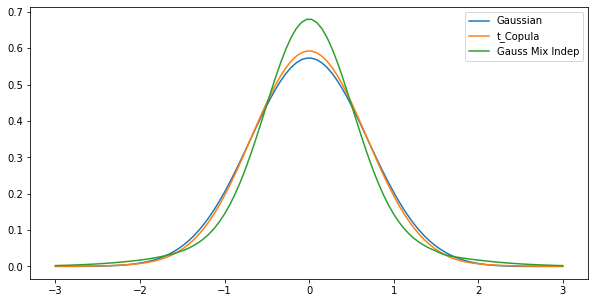

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x_arr, f1, label=Copulae_names[0])
plt.plot(x_arr, f2, label=Copulae_names[1])
# plt.plot(x_arr, f3, label=Copulae_names[2])
# plt.plot(x_arr, f4, label=Copulae_names[3])
# plt.plot(x_arr, f5, label=Copulae_names[4])
# plt.plot(x_arr, f6, label=Copulae_names[5])
plt.plot(x_arr, f7, label=Copulae_names[6])
plt.legend()

In [25]:
s1 = C1.sample(1000)
s2 = C2.sample(1000)
s3 = C3.sample(1000)
s4 = C4.sample(1000)
s5 = C5.sample(1000)
s6 = C6.sample(1000)
s7 = C7.sample(1000)

/Users/francis/Google Drive/00_IRTG1792/copula/src/toolbox.py:293: RuntimeWarning: invalid value encountered in power
  part2 = np.sin(self.alpha * (U + xi)) / (np.cos(U) ** (1 / self.alpha))
/Users/francis/Google Drive/00_IRTG1792/copula/src/toolbox.py:294: RuntimeWarning: invalid value encountered in power
  part3 = (np.cos(U - self.alpha * (U + xi)) / W) ** ((1 - self.alpha) / self.alpha)


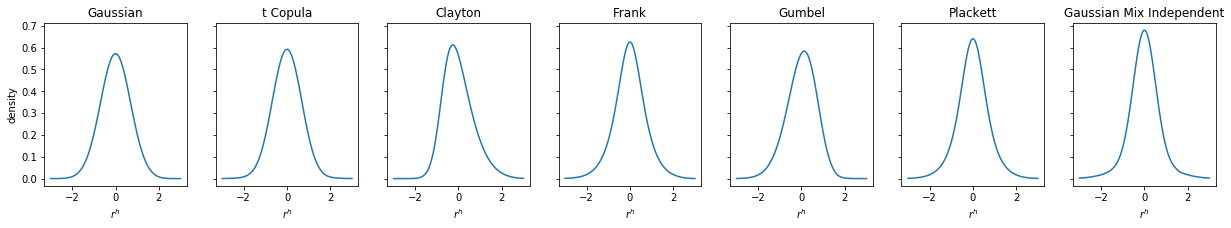

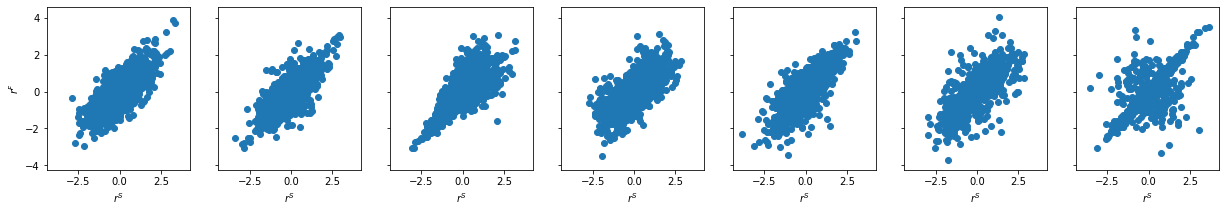

In [59]:
fig, axs = plt.subplots(1,7, figsize=(21,3), sharey=True)
axs[0].plot(x_arr, f1, label=Copulae_names[0])
axs[0].set_title('Gaussian')

axs[1].plot(x_arr, f2, label=Copulae_names[1])
axs[1].set_title('t Copula')

axs[2].plot(x_arr, f3, label=Copulae_names[2])
axs[2].set_title('Clayton')

axs[3].plot(x_arr, f4, label=Copulae_names[3])
axs[3].set_title('Frank')

axs[4].plot(x_arr, f5, label=Copulae_names[4])
axs[4].set_title('Gumbel')

axs[5].plot(x_arr, f6, label=Copulae_names[5])
axs[5].set_title('Plackett')

axs[6].plot(x_arr, f7, label=Copulae_names[6])
axs[6].set_title('Gaussian Mix Independent')

axs[0].set_ylabel('density')
for i in range(7):
    axs[i].set_xlabel(r'$r^h$')
plt.savefig('../latex/_pics/density illustration1.png', transparent=True)

fig, axs = plt.subplots(1,7, figsize=(21,3), sharey=True, sharex=True)
axs[0].scatter(s1[:,0], s1[:,1])
axs[1].scatter(s2[:,0], s2[:,1])
axs[2].scatter(s3[:,0], s3[:,1])
axs[3].scatter(s4[:,0], s4[:,1])
axs[4].scatter(s5[:,0], s5[:,1])
axs[5].scatter(s6[:,0], s6[:,1])
axs[6].scatter(s7[:,0], s7[:,1])

axs[0].set_ylabel(r'$r^F$')
for i in range(7):
    axs[i].set_xlabel(r'$r^S$')

plt.savefig('../latex/_pics/density illustration2.png', transparent=True)
# axs[1,1].plot(x_arr, f2, label=Copulae_names[1])
# axs[1,2].plot(x_arr, f3, label=Copulae_names[2])
# axs[1,3].plot(x_arr, f4, label=Copulae_names[3])
# axs[1,4].plot(x_arr, f5, label=Copulae_names[4])
# axs[1,5].plot(x_arr, f6, label=Copulae_names[5])
# axs[1,6].plot(x_arr, f7, label=Copulae_names[6])

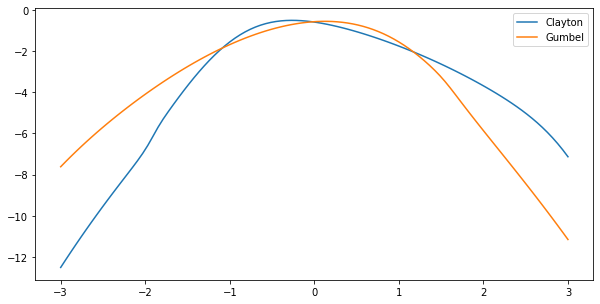

In [12]:
plt.figure(figsize=(10,5))
# plt.plot(x_arr, np.log(np.array(f1)), label=Copulae_names[0])
# plt.plot(x_arr, np.log(np.array(f2)), label=Copulae_names[1])
plt.plot(x_arr, np.log(np.array(f3)), label=Copulae_names[2])
# plt.plot(x_arr, np.log(np.array(f4)), label=Copulae_names[3])
plt.plot(x_arr, np.log(np.array(f5)), label=Copulae_names[4])
# plt.plot(x_arr, np.log(np.array(f6)), label=Copulae_names[5])
# plt.plot(x_arr, np.log(np.array(f7)), label=Copulae_names[6])
plt.legend()

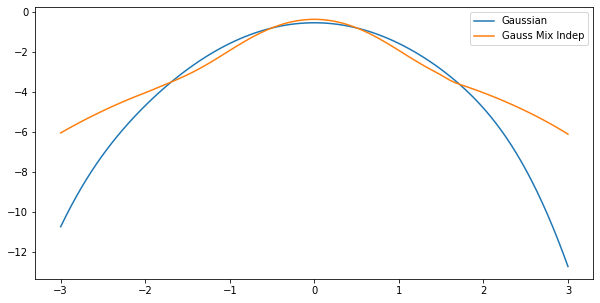

In [62]:
plt.figure(figsize=(10,5))
plt.plot(x_arr, np.log(np.array(f1)), label=Copulae_names[0])
# plt.plot(x_arr, np.log(np.array(f2)), label=Copulae_names[1])
# plt.plot(x_arr, np.log(np.array(f3)), label=Copulae_names[2])
# plt.plot(x_arr, np.log(np.array(f4)), label=Copulae_names[3])
# plt.plot(x_arr, np.log(np.array(f5)), label=Copulae_names[4])
# plt.plot(x_arr, np.log(np.array(f6)), label=Copulae_names[5])
plt.plot(x_arr, np.log(np.array(f7)), label=Copulae_names[6])
plt.legend()

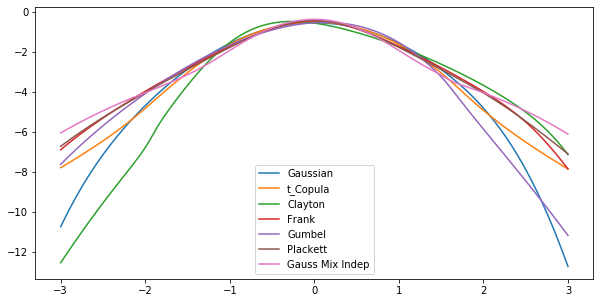

In [14]:
plt.figure(figsize=(10,5))
plt.plot(x_arr, np.log(np.array(f1)), label=Copulae_names[0])
plt.plot(x_arr, np.log(np.array(f2)), label=Copulae_names[1])
plt.plot(x_arr, np.log(np.array(f3)), label=Copulae_names[2])
plt.plot(x_arr, np.log(np.array(f4)), label=Copulae_names[3])
plt.plot(x_arr, np.log(np.array(f5)), label=Copulae_names[4])
plt.plot(x_arr, np.log(np.array(f6)), label=Copulae_names[5])
plt.plot(x_arr, np.log(np.array(f7)), label=Copulae_names[6])
plt.legend()

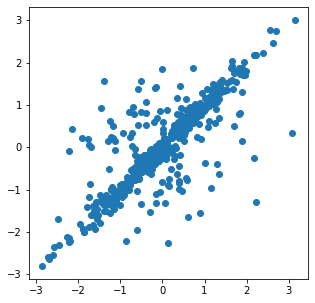

In [15]:
s = C7.sample(500)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])

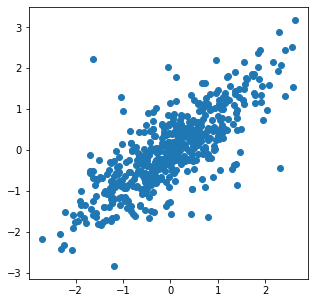

In [16]:
s = C2.sample(500)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])

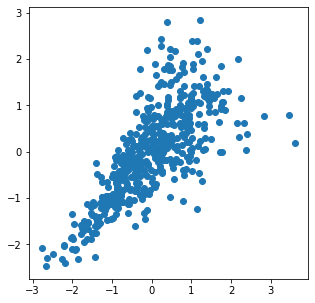

In [17]:
s = C3.sample(500)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])

In [ ]:
s = C5.sample(500)
plt.figure(figsize=(5,5))
plt.scatter(s[:,0], s[:,1])